# ODE Tutorial

## Objectives:
- Build an mathematical **intuition** of first order ordinary differential equations
- Learn to **analytically solve** first order ODEs
- Learn to **numerically solve** first order ODEs using **Forward Euler Integration**
- Think about **logistic** functions

## Install Packages

In [1]:
!pip install ./dependencies/numpy/*

Processing ./dependencies/numpy/numpy-1.24.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
numpy is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [2]:
!pip install ./dependencies/matplotlib/*

Processing ./dependencies/matplotlib/Pillow-9.5.0-cp311-cp311-manylinux_2_28_x86_64.whl
Processing ./dependencies/matplotlib/contourpy-1.0.7-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
Processing ./dependencies/matplotlib/cycler-0.11.0-py3-none-any.whl
Processing ./dependencies/matplotlib/fonttools-4.39.3-py3-none-any.whl
Processing ./dependencies/matplotlib/kiwisolver-1.4.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
Processing ./dependencies/matplotlib/matplotlib-3.7.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
Processing ./dependencies/matplotlib/numpy-1.24.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
Processing ./dependencies/matplotlib/packaging-23.0-py3-none-any.whl
Processing ./dependencies/matplotlib/pyparsing-3.0.9-py3-none-any.whl
Processing ./dependencies/matplotlib/python_dateutil-2.8.2-py2.py3-none-any.whl
Processing ./dependencies/matplotlib/six-1.16.0-py2.py3-none-any.whl
Pillow is already installed with the s

## Import Packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Section 1: What is a Differential Equation?

#### Differential equations describe change

Neurons with "dynamics" have properties that change over time. To describe "how" these properties change, we can ascribe mathematical formulations, called differential equations. Knowing how these properties change over time allow us to build models of temporally dynamic neurons (or anything else that changes, such as the growth of populations, radioactive decay, or even periodic events).

A differential equation has the form:

$$ \frac{dx}{dt} = \frac{"change"}{"time"} $$

There are many forms of differential equations, but we will focus largely on first-order differential equations, which can be written as:

$$ \frac{dx}{dt} = G(x(t)) $$

where $x$ is a function of $t$, and $G$ is a function of $x(t)$.

An example of simple differential equation is:

$$ \frac{dx}{dt} = 10 x(t)$$

This description of the change in variable $x$ over time says that the variable $x$ will increase by a magnitude of 10 times the value of itself at the next time-step. 

For example, if you wanted to model how quickly a fire spreads in a dry plain, it could be that the growth (the rate of change) of the fire will be 10 times the magnitude of the current fire in the next moment. The speed at which the blazing fire will grow next will be 10 times the next magnitude of the fire in the moment after that. (Yikes!)

---

#### Solutions to Differential Equations

How might we view how this system changes over time? This requires that we find a "solution".

A solution to a differential equation allows us to see the trajectory of the variable over time, which is completely determined by the rules the differential equation describes.

Here we will talk about two ways to solve a differential equation: using ***Analytic*** methods and ***Numerical*** methods.

An ***Analytic*** solution involves using algebra to "solve" for the function of interest, involving an integration step.

$$ \frac{dx}{dt} \rightarrow x(t) $$

A ***Numerical*** solution involves using an algorithm to numerically approximate the definite integral of the differential equation. This process is called "numerical integration". Numerical integration methods can range from simple (for example, the forward Euler integration method) to more sophisticated.

Why might we use one method over the other? 
- Analytic solutions are more precise than numerical solutions, but may not be feasible to find algebraically. 
- Numerical solutions provide approximations that can be characterized further, but require more computational resources (time and memory) than analytic solutions.



---

## Section 2: Examples of ODEs

### Section 2.1: Constant Growth (Linear Model)

Let's explore a very simple differential equation:

$$ \frac{dx(t)}{dt} = a$$
where $a$ is a constant.

**Intuition:**
If we were to predict the behavior of $x(t)$, what would happen to $x$ over time if $a > 0$? If $ a < 0$? If $a = 0$?

#### Section 2.1.1: Analytic Solution

Let's use algebra and calculus to solve for $x(t)$.

$$ \frac{dx}{dt} = a $$

Use algebra to separate the variables ($x$ and $t$) onto the left and right sides of the equation.

$$ dx = a dt $$

Take the integral of both sides.

$$ \int_{-\infty}^{\infty} dx = a \int_{-\infty}^{\infty}dt $$

Integrate each side, producing a coefficient of integration for each.

$$ x(t) + C_0 = at + C_1 $$

Replace the two coefficients with a new coefficient for simplicity of notation.

$$ x(t) = at + C_1 - C_0 $$
$$ x(t) = at + C $$

This equation represents a family of functions with many different possible initial conditions. Therefore, it is important to find a way to represent what the initial condition of this system is. To do this, solve for $x(t)$ when (t=0).

$$ x(0) = 0 + C $$
$$ x(0) = x_0 = C $$

Therefore the analytic solution of this system of differential equations is:

$$ x(t) = at + x_0 $$

---

**Visualize:** What does this solution look like?

Let's plot this solution to visualize it. First let's define the analytic solution.

**Code:** Complete the definition of the analytic solution function.

In [4]:
# Define the analytic solution ##TODO## Edit for student version
def x_constant(t_range, a, x_0):
    return(a * t_range + x_0)

Second, let's assume the values of $a$ and the initial value $x_0$.

In [5]:
# Initialize parameters of the analytic solution
a = 1
x_0 = 5

Third, let's initialize a time range, since we want to view $x$ as a function of $t$. To do so, we will use the `np.arange()`. Then we will print the value of the resulting time range.

In [6]:
# Initialize the time range
T = 50 # Maximum time value
dt = 1 # Time step
t_range = np.arange(0, T, dt) # arguments are (start, stop, step size)

print(t_range) # Print time_range

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


Now that we've defined the analytic solution function, `x_constant()`, initialized the parameters and initialized the input to our function, we can now calculate the solution and plot it.

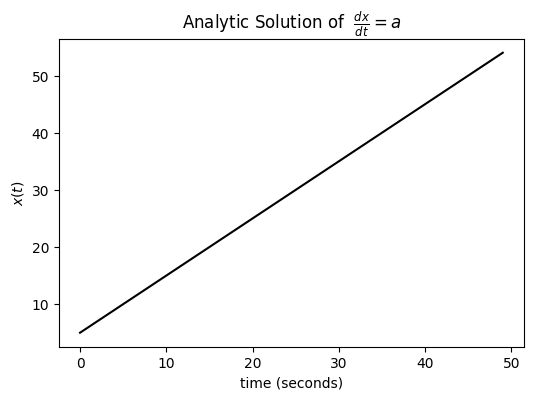

In [7]:
# Calculate the analytic solution trajectory
solution_constant = x_constant(t_range, a, x_0)

# Plot the analytic solution trajectory
fig, ax = plt.subplots(1,1,figsize=(6,4),facecolor='white')
ax.plot(t_range, solution_constant, c='black')
ax.set_title(r'Analytic Solution of  $\frac{dx}{dt} = a$')
ax.set_xlabel('time (seconds)')
ax.set_ylabel('$x(t)$')
plt.show()

**Think:** 
- How would you verbally describe the variable's change over time?
- How do each of the parameters of the model correspond to the solution?

Now let's use a numerical integration technique to approximate the solution to the differential equation.

---

### Section 2.2: Proportional Growth/Decay (Exponential)

Let's consider this new differential equation:
$$ \frac{dx}{dt} = ax $$
where $a$ is a constant.

**Intuition**: Sketch and/or talk through your prediction of what should happen to the variable $x$'s trajectory when:
- $a = 0$? $a > 0$? $a < 0$?
- $a = 1$? $a > 1$? $a < 1$?

---

#### Section 2.2.1: Analytic Solution

Let's use algebra and calculus to solve for $x(t)$.

$$ \frac{dx}{dt} = ax $$

Use algebra to separate the variables ($x$ and $t$) onto the left and right sides of the equation.

$$ \frac{1}{x} dx = a dt $$

Take the integral of both sides.

$$ \int_{-\infty}^{\infty} \frac{1}{x} dx = a \int_{-\infty}^{\infty}dt $$

Integrate each side (combine the coefficients of integration in this step as well).

$$ \ln{|x|} = at + C $$

We must solve for $x(t)$, so let's exponentiate each side to do so.

$$ e^{\ln{|x|}} = e^{at + C}$$

$$ |x| =  e^{at + C} $$

$$ |x| = e^C e^{at} $$

Exponential functions are always non-negative, so we can drop the absolute value since $x$ will then always be positive.

$$ x = e^C e^{at} $$

This equation represents a family of functions with many different possible initial conditions. Therefore, it is important to find a way to represent what the initial condition of this system is. To do this, solve for $x(t)$ when (t=0).

$$ x(0) = e^C e^{a(0)} $$

$$ x(0) = x_0 = e^C $$

Therefore the analytic solution of this system of differential equations is:

$$ x(t) = x_0e^{at} $$

**Visualize:** What does this solution look like?

Let's plot this solution to visualize it. First let's define the analytic solution.

**Code:** Complete the definition of the analytic solution function.

In [8]:
# Define the analytic solution ##TODO: Remove code for student version
def x_proportion(t, a_param, x_0):
    return(x_0 * np.exp(a_param * t))

Next, let's assume the values of $a$ and the initial value $x_0$.

In [9]:
# Initialize parameters of the analytic solution
a = 0.5
x_0 = 1

Next, let's initialize the time range.

In [10]:
# Initialize the time range
T = 10
dt = 0.1
t_range = np.arange(0, T, dt)

print(t_range) # Print time_range

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


Now that we've defined the analytic solution function, `x_proportion()`, initialized the parameters and initialized the input to our function, we can now calculate the solution and plot it.

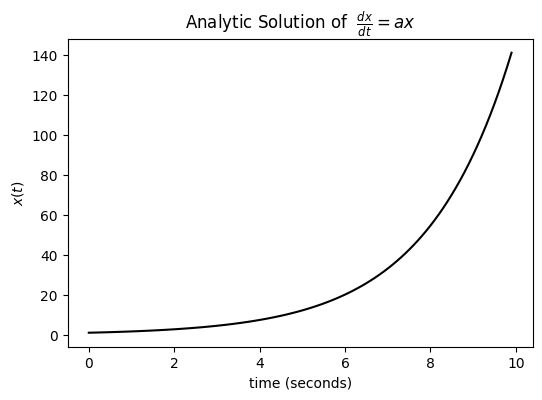

In [11]:
# Plot the analytic solution trajectory

solution_proportion = x_proportion(t_range, a, x_0)

fig, ax = plt.subplots(1,1,figsize=(6,4),facecolor='white')
ax.plot(t_range, solution_proportion, c='black')
ax.set_title(r'Analytic Solution of  $\frac{dx}{dt} = ax$')
ax.set_xlabel('time (seconds)')
ax.set_ylabel('$x(t)$')
plt.show()

**Think:** 
- How would you verbally describe the variable's change over time?
- How do each of the parameters of the model correspond to the solution?

Now let's use a numerical integration technique to approximate the solution to the differential equation.

---

#### Section 2.2.2: Numerical Solution

Here we will use the explicit numerical integration algorithm, "Forward Euler Integration".

But first let's think about time. Though time is continuous, it can be approximated discretely using "time steps" ($t_0, t_1, t_2 ...$) such that:

$$ t_{i+1} = t_i + dt $$

$dt$ defines the size of the time steps. If $dt$ is small enough, one can well-approximate the change in $x(t)$ as one moves from one discrete point in time to the next discrete point in time.

If we start from the definition of a differential equation, we can think about how we can use $dt$ to find the change in $x(t)$.

$$ \frac{dx}{dt} = G(x(t)) = \dot{x} $$

$$ dx = \dot{x}dt $$

Knowing $dx$ we can approximate $x(t)$ at the next time step, ($t_i$), using what we know of $x(t)$ at the previous time step, ($t-1)$. This works well if $dt$ is small enough.

$$ dx = \dot{x}dt $$

$$ x(t_i) - x(t_i-1) = \dot{x}(t_i-1)dt $$

As you can see, $\dot{x}(t_i-1)$ is the change in $x$ during the previous time step, as defined by the differential equation describing this system.

The final form of this equation for approximating the next time step is:

$$ x(t_i)  = x(t_i-1) + \dot{x}(t_i-1)dt $$

Below we will define a forward euler integration function. 

But before we do, let's define two things:
1. the core calculation of this integration method, which is how we find the value of $x$ at the next time step.
2. the differential equation of interest, which describes how x will change over time

**Code:** Define the `update_x` function by filling in the code for approximating $x(t)$ at the next time step.

In [12]:
def update_x(x_val, xdot, dt):
    x_next = x_val + xdot*dt ##TODO: Remove in student version
    return(x_next)

**Code:** Define the `dxdt_prop` function by filling in the code for our differential equation we are trying to numerically integrate.

In [13]:
def dxdt_prop(a_param, x_val):
    dxdt = a_param * x_val ##TODO: Remove in student version
    return dxdt

Below, we will define a forward euler integration function, `forward_euler_prop()`. 

Read each comment in this code block to understand the steps involved in defining this function.

In [14]:
def forward_euler_prop(a, x_0, dt, T):
    """Compute solution of the differential equation xdot=a*x with
    initial condition x0 for a duration T. Use time step dt for numerical
    solution.

    Args:
    a (scalar): parameter of xdot (xdot=a*x)
    x0 (scalar): initial condition (x at time 0)
    dt (scalar): timestep of the simulation
    T (scalar): total duration of the simulation

    Returns:
    ndarray, ndarray: `x` for all simulation steps and the time `t` at each step
    """

    # Initialize variables
    t = np.arange(0, T, dt)
    x = np.zeros_like(t)
    x[0] = x_0 # This is x at time t_0

    # Step through system and integrate in time
    for k in range(1, len(t)):
        
        # for each point in time, compute xdot from x[k-1]
        xdot = dxdt_prop(a, x[k-1]) # Differential equation function

        # Update x based on x[k-1] and xdot
        x[k] = update_x(x[k-1], xdot, dt)

    return x, t



Let's now choose parameters and use Euler's method to produce an approximation of $x(t)$ over time.

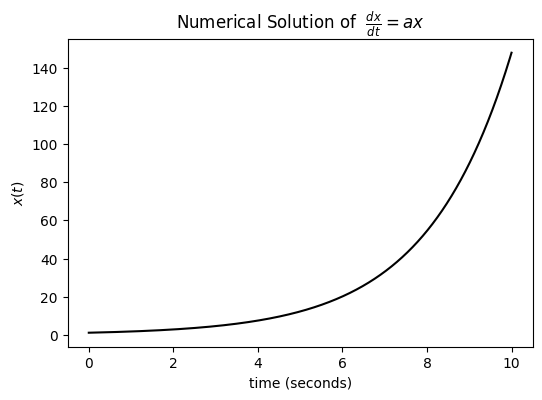

In [25]:
# Choose parameters
a = 0.5    # parameter in f(x)
T = 10      # total Time duration
dt = 0.001  # timestep of our simulation
x_0 = 1.     # initial condition of x at time 0

# Use Euler's method
solution_numeric_prop, t = forward_euler_prop(a, x_0, dt, T)

# Visualize
fig, ax = plt.subplots(1,1,figsize=(6,4),facecolor='white')
ax.plot(t, solution_numeric_prop, c='black')
ax.set_title(r'Numerical Solution of  $\frac{dx}{dt} = ax$')
ax.set_xlabel('time (seconds)')
ax.set_ylabel('$x(t)$')
plt.show()

**Play:** Below, let's plot both the analytic solution and the numeric solution and compare them.
- Is the numerical solution an adequate approximation of the precise analytic solution?
- Change the parameters:
    - Change `dt = 0.1` instead of `dt = 0.001`. How does `dt` impact the comparison between the two solutions? Why might they be the same/different?
    - What happens when you make `a` a negative number? What happens if you increase its magnitude?
    - What happens when you change `x_0`?
    
(Try adding another `x_solution` variable and plot it using the `plt.plot()` function in the code block below to compare more parameter settings side by side!)

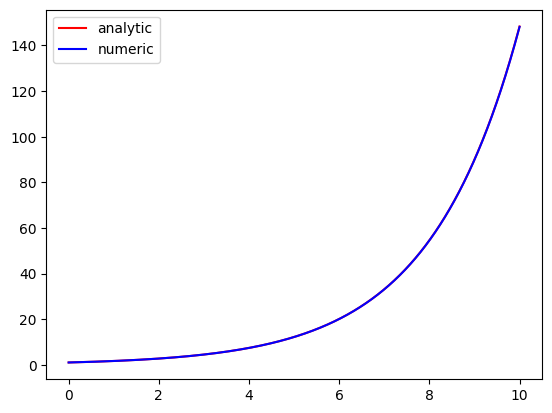

In [32]:
# Compare analytic and numerical solutions

# Choose parameters
a = 0.5    # parameter in f(x)
T = 10      # total Time duration
dt = 0.001  # timestep of our simulation
x_0 = 1.     # initial condition of x at time 0



# Get numeric solution
x_numeric, t = forward_euler_prop(a, x_0, dt, T)

# Get analytic solution
x_analytic = x_proportion(t, a, x_0)

### OPTIONAL ###
# Use the space below to calculate another solution with different parameters for comparison

################

# Plot both numeric and analytic solutions

plt.plot(t, x_analytic, color='red', label='analytic')
plt.plot(t, x_numeric, color='blue', label='numeric')

### OPTIONAL ###
# Use the space below to plot your new solution that you made above

################
plt.legend()
plt.show()

**Homework:** Make two plots and describe the role of the parameters for $x(t)$ for each plot.
1. A set of solutions for $x(t)$ using a range of values for `a` and only one value for `x_0`
2. A set of solutions for $x(t)$ using a range of values for `x_0` and only one value for `a`

*Hint:* Try to use a `for` loop to iterate through different values of your parameter of interest.

---

### Section 2.3: Growth as an asymptote (Logistic Model)

Let's consider our final differential equation:
$$ \frac{dx}{dt} = ax(1-\frac{x}{K}) $$
where $a$ and $K$ are constants.

This is the logistic function, which is relevant for modeling many kinds of dynamic systems, particularly in biology and biophysical models of neurons. 

Think back to the Hodgkin-Huxley equations in particular and you will find examples of the logistic equation! Take potassium current for example,
$$I_{K}(V) = g_K(V)(V - E_K)$$

**Think:** How does the differential equation above have a similar structure to the potassium current equation?

**Intuition**: Sketch and/or talk through your prediction of what should happen to $\frac{dx}{dt}$ under the following assumptions:

- Assume $K$ = 1. What happens to $\frac{dx}{dt}$ when:
    - What are the three situations when $\frac{dx}{dt} = 0$?
    - What happens to $\frac{dx}{dt}$ when $(1 - \frac{x}{K})$ approaches 0? (think about the sign of $\frac{dx}{dt}$)
    - What value must $x$ be when $(1 - \frac{x}{K}) = 0$?
- Make a guess as to what the function $x(t)$ looks like based on your predictions above.

**Optional Homework:** If you are so inclined, solve for $x(t)$ analytically. However, this is a non-linear first order differential equation (the previous examples were linear), so solving this will not be as straightforward!

---

#### Section 2.3.1: Numerical Solution

It is a bit more complicated to find the analytical solution for this differential equation, ans so are many other types of differential equations that define the dynamics of other systems. That is why we might turn to numerical integration methods to view the trajectory of our system's variables. 

Below we will use Forward Euler Integration to visualize $x(t)$ based on the differential equation $ \frac{dx}{dt} = ax(1-\frac{x}{K}) $ and parameters we choose ($x_0, a, K$).

First we will define the differential equation function.

**Code:** Define the differential equation `dxdt_log()`.

In [21]:
def dxdt_log(a, K, x_val):
    dxdt = a*x_val * (1 - x_val/K) ##TODO: remove in student version
    return(dxdt)

Study the `forward_euler_logistic()` function and note what makes it different from `forward_euler_exp()`.

In [33]:
def forward_euler_logistic(a, x_0, K, dt, T):
    """Compute solution of the differential equation of a logistic function with
    initial condition x_0 for a duration T. Use time step dt for numerical
    solution.

    Args:
    a (scalar): parameter of xdot
    x_0 (scalar): initial condition (x at time 0)
    K (scalar): parameter of xdot
    dt (scalar): timestep of the simulation
    T (scalar): total duration of the simulation

    Returns:
    ndarray, ndarray: `x` for all simulation steps and the time `t` at each step
    """

    # Initialize variables
    t = np.arange(0, T, dt)
    x = np.zeros_like(t)
    x[0] = x_0 # This is x at time t_0

    # Step through system and integrate in time
    for k in range(1, len(t)):
        
        # for each point in time, compute xdot from x[k-1]
        xdot = dxdt_log(a, K, x[k-1])

        # Update x based on x[k-1] and xdot
        x[k] = update_x(x[k-1], xdot, dt)

    return x, t



Now that our differential equation and numerical integration methods are defined, we can choose parameters, get a numerical solution, and plot the solution, $x(t)$.

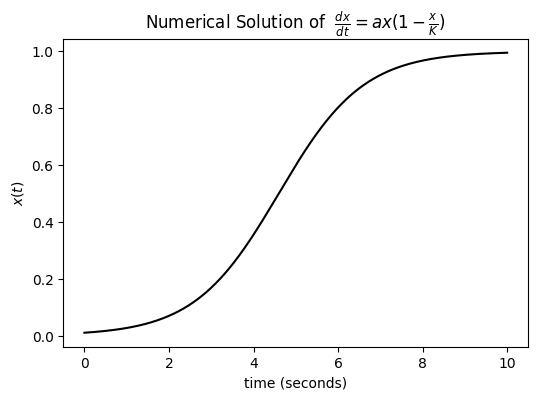

In [36]:
# Choose parameters
a = 1       # parameter in G(x)
K = 1      # parameter in G(x)
T = 10      # total Time duration
dt = 0.001  # timestep of our simulation
x_0 = 0.01   # initial condition of x at time 0

# Use Euler's method
solution_numeric_logistic, t = forward_euler_logistic(a, x_0, K, dt, T)

# Visualize
fig, ax = plt.subplots(1,1,figsize=(6,4),facecolor='white')
ax.plot(t, solution_numeric_logistic, c='black')
ax.set_title(r'Numerical Solution of  $\frac{dx}{dt} = ax(1-\frac{x}{K})$')
ax.set_xlabel('time (seconds)')
ax.set_ylabel('$x(t)$')
plt.show()

**Think:** Does the behavior of $x(t)$ match your intuition? What is different?

**Think:** How does the behavior of $x(t)$ seem relevant for modeling systems in biology? Think of an example system that has this same type of behavior.

**Homework:** Let's systematically observe the impact of the parameter values on the trajectory of $x(t)$. Plot $x(t)$ using a range of parameters on the same graph.
- How does the value of `a` impact the shape?
- How does the value of `K` impact the shape?
- How does the value of `x_0` impact the shape?

*Hint:* Try to use a `for` loop to iterate through different values of your parameter of interest.

### Bonus: Logistic Equation

The logistic equation has special properties that make it useful for modeling biological, physical, economic, and machine learning systems. 

The logistic equation has the form:

$$ x(t) = \frac{1}{1 + (\frac{1}{x_0} - 1) e^{-Kt}} $$

**Homework:** Plot the logistic equation and compare it to the numeric solution we produced above.
- Do they have the same shape?

**Homework:** Plot the logistic equation and visualize how its shape changes as you change the parameter values.
- What descriptive feature of the plot does each parameter seem to determine?

---

## Conclusion

In this tutorial we:
- Learned what an ordinary (first order) differential equation is
- Analytically solved linear and exponential equations
- Used the Forward Euler numerical integration method to view system trajectories
- Thought about the Logistic function, which is  highly relevant to biological modeling

Use this tutorial and your notes as a reference for intuitively connecting how the formal mathematical definitions of ODEs correspond to a system's behavior.

The next tutorial will be using the structure of the logistic function to model single neuron input-output phenomena.

## References

- Much of this tutorial was structured based on Julie Wood's ["Introductory ODEs"](https://quantdev.ssri.psu.edu/sites/qdev/files/ODEintro_tutorial.html) tutorial in R.
- Read more about the logistic equation in the [Wolfram Mathworld](https://mathworld.wolfram.com/LogisticEquation.html) entry.